In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_excel('11907267.xlsx')

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df.head()

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,Height,CA_1,CA_2,CA_3,CA_4,Weight,ScholarType,Direction,CourseType,Gender,Medium,ProgramType
0,318192,7751776776,WVODHY88,E,59.0,9.0,9.0,NaN,84.0,Bachelor of Technology (Computer Science and E...,153,32.0,15.0,7.0,5.0,62,Hostler,North,Theory,Male,English,UG
1,318192,7751776776,WVODHY89,C,74.0,NaN,NaN,35.0,70.0,Bachelor of Technology (Computer Science and E...,153,54.0,3.0,10.0,7.0,62,Hostler,North,Theory,Male,English,UG
2,418192,7753776776,VISJTC541,O,NaN,NaN,NaN,89.0,NaN,Bachelor of Technology in Computer Science and...,153,NaN,NaN,NaN,NaN,97,Hostler,North,Practical,Male,English,UG
3,418192,7754776776,VISJTC322,E,25.0,22.0,20.0,NaN,98.0,Bachelor of Technology in Computer Science and...,166,0.0,19.0,3.0,3.0,87,Hostler,East,Theory,Female,English,UG
4,418192,7754776776,VISJTC323,B+,80.0,NaN,NaN,44.0,100.0,Bachelor of Technology in Computer Science and...,166,43.0,22.0,1.0,14.0,87,Hostler,East,Theory,Female,English,UG


In [0]:
reg_no = df[['Regd No']].drop_duplicates()
mhrd = df[['MHRDName']].drop_duplicates()
courses = df[['Course']].drop_duplicates()

In [61]:
ctype = df[['Course','CourseType']].drop_duplicates(subset='Course')
ctype

theory = ctype[ctype['CourseType'].eq('Theory')]
practical = ctype[ctype['CourseType'].eq('Practical')]
theory.dropna()
practical.dropna()


prac = practical.count()
theo = theory.count()
prac,theo


(Course        30
 CourseType    30
 dtype: int64, Course        723
 CourseType    723
 dtype: int64)

In [62]:
scholar = df[['Regd No','ScholarType']].drop_duplicates(subset='Regd No')

day = scholar[scholar.eq('Day Scholar')]
hosteler = scholar[scholar.eq('Hostler')]

day = day['ScholarType'].dropna()
hosteler = hosteler['ScholarType'].dropna()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


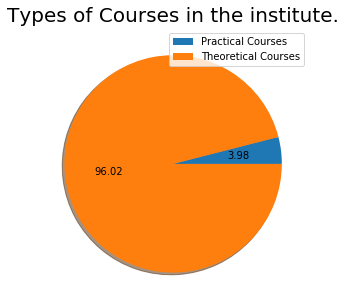

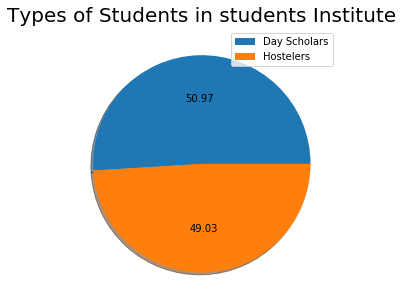

In [63]:
plt.figure(figsize=(5,5))
plt.title('Types of Courses in the institute.',fontdict={'fontsize':20})
plt.pie((prac['Course'],theo['Course']),autopct='%.2f',shadow=True)
plt.legend(['Practical Courses','Theoretical Courses'])
plt.show()
print('\n')

plt
plt.figure(figsize=(5,5))
plt.title('Types of Students in students Institute',fontdict={'fontsize':20})
plt.pie((day.count(),hosteler.count()),autopct='%.2f',shadow=True)
plt.legend(['Day Scholars','Hostelers'])
plt.show()

In [0]:
mhrd = df[['MHRDName','Regd No']].drop_duplicates(subset="Regd No")


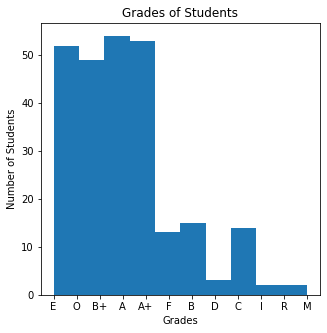

In [65]:
grades = df[['Regd No','Grade']].drop_duplicates(subset='Regd No')

plt.figure(figsize=(5,5))
plt.title('Grades of Students')
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.hist(grades['Grade'])
plt.show()

In [66]:
#Analysing the grades of the students of different departments
high_grades = grades['Grade']<'B+'

high_grades = mhrd[high_grades]
high_grades

,MHRDName,Regd No
30,Bachelor of Technology in Computer Science and...,7763776776
59,Bachelor of Technology in Computer Science and...,7771776776
71,Bachelor of Technology (Mechanical Engineering),7773776776
72,Bachelor of Technology (Mechanical Engineering),7774776776
85,Bachelor of Science (Honours) (Agriculture),7777776776
...,...,...
1527,Bachelor of Technology (Electrical Engineering),8116776776
1530,Bachelor of Technology in Mechanical Engineeri...,8117776776
1566,Master of Technology (Electrical Engineering),8121776776
1631,Bachelor of Technology in Computer Science and...,8137776776


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


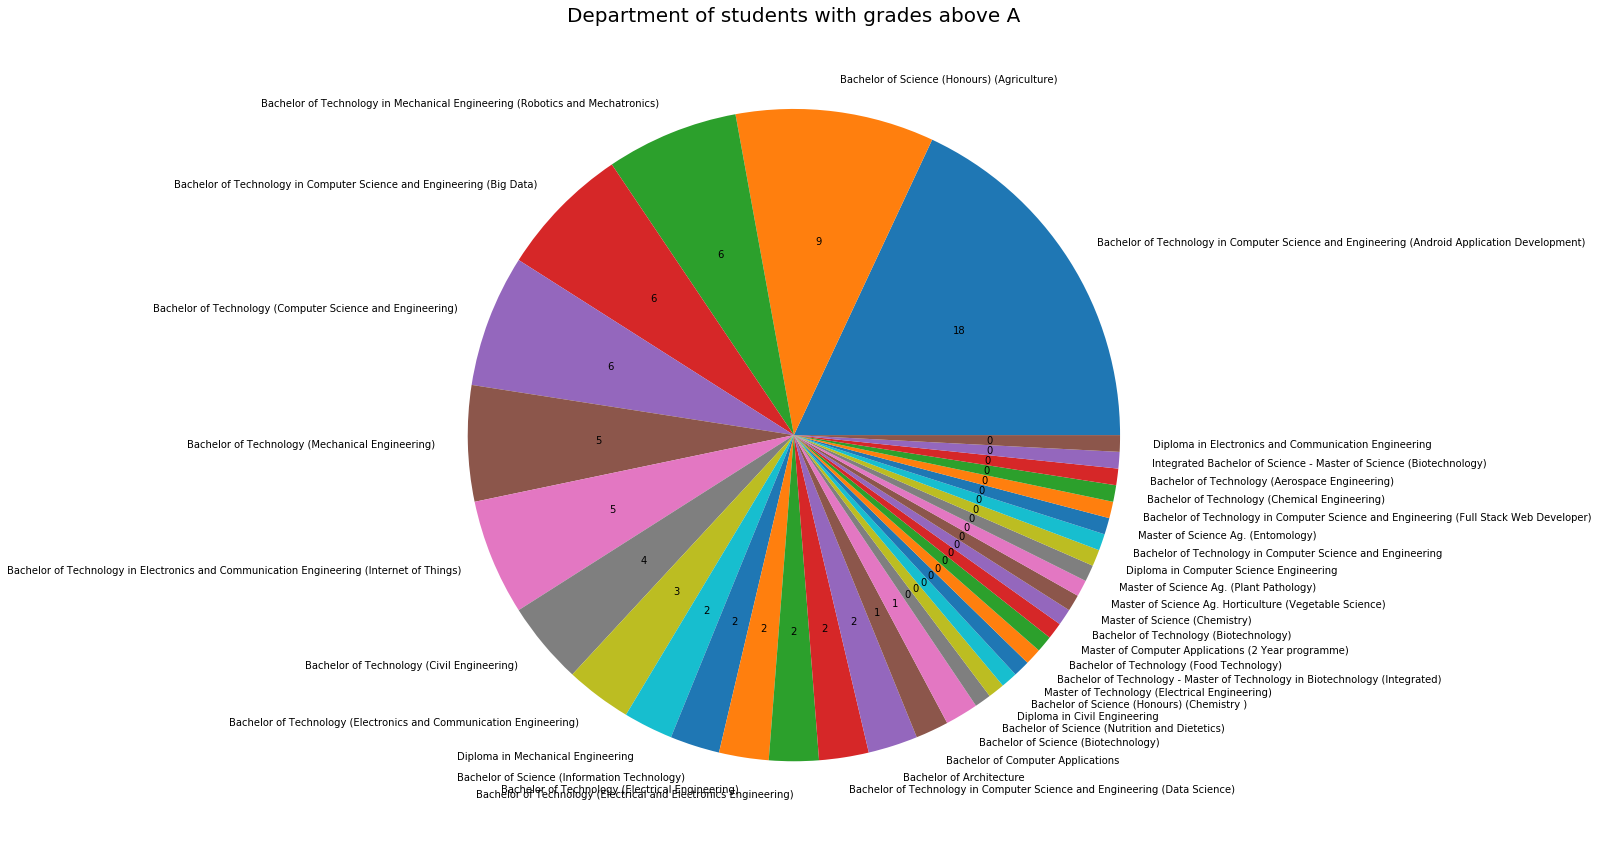

In [67]:
#Converting the data set into Pandas Series to fetch the count.
temp = pd.Series(high_grades['MHRDName']) 
countn = temp.value_counts()
countn = pd.DataFrame(countn) #Converting the counted series back to the data frame

countn = countn.rename(columns={'MHRDName':'Student Count'}) #Renaming Column

plt.figure(figsize=(15,15))
plt.title('Department of students with grades above A',fontdict={'fontsize':20})
plt.pie(countn,labels=countn.index,autopct='%.i')
plt.show()


In [0]:
marks = df[['ETT_100','CA_100','MTT_50','Course','CourseType']].drop_duplicates(subset='Course')

marks = marks[marks['CourseType'].eq('Theory')]

ett = marks['ETT_100'].dropna()
ett = sorted(ett)
ca = marks['CA_100'].dropna()
ca = sorted(ca)
mtt = marks['MTT_50'].dropna()
mtt = sorted(mtt)

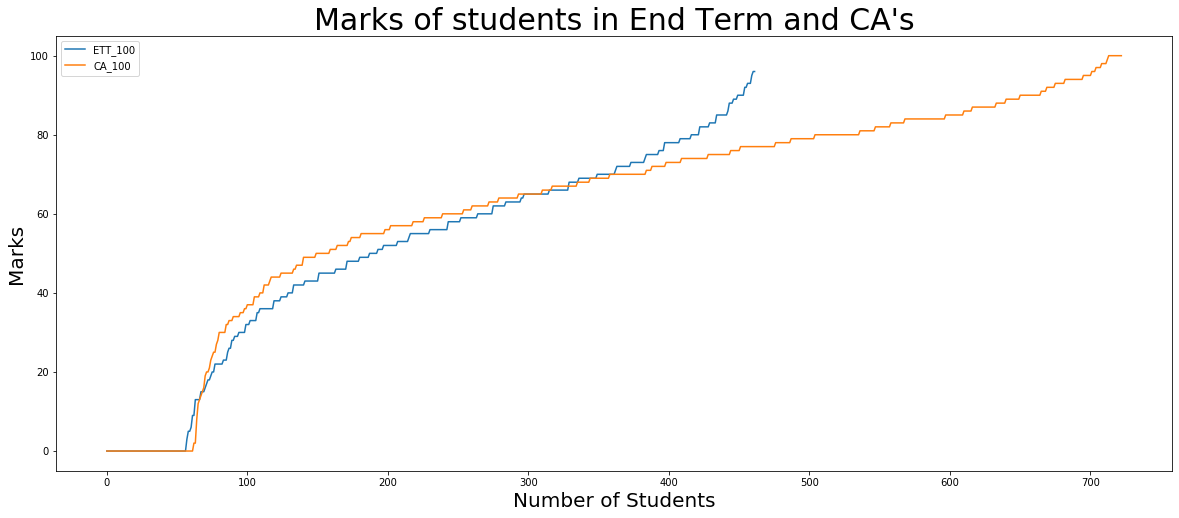

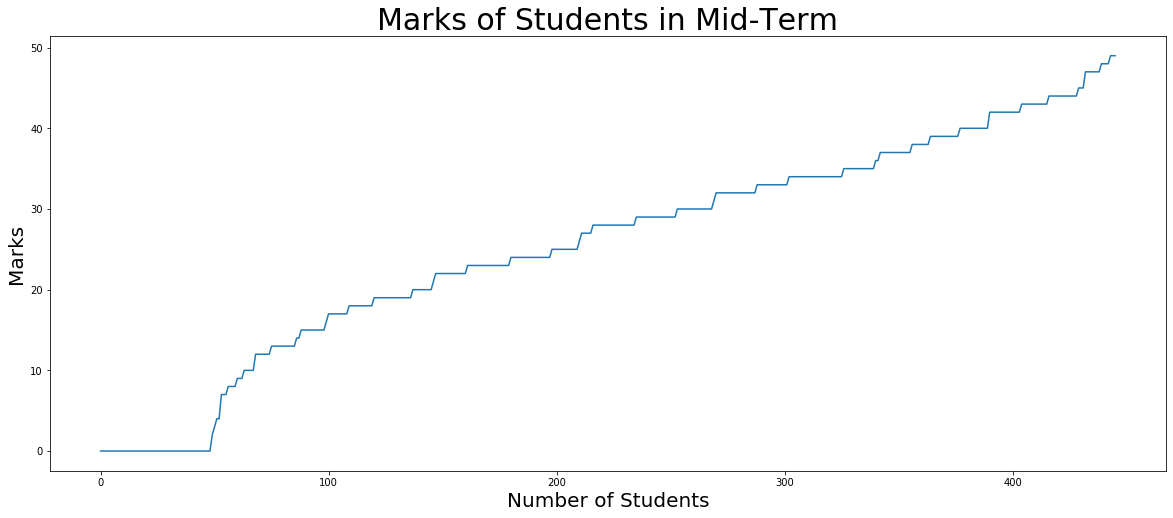

In [69]:
plt.figure(figsize=(20,8))
plt.title("Marks of students in End Term and CA's",fontdict={'fontsize':30})
plt.xlabel('Number of Students',fontdict={'fontsize':20})
plt.ylabel('Marks',fontdict={'fontsize':20})
plt.plot(ett)
plt.plot(ca)
plt.legend(['ETT_100','CA_100'])
plt.show()

print('\n')
plt.figure(figsize=(20,8))
plt.title('Marks of Students in Mid-Term',fontdict={'fontsize':30})
plt.xlabel('Number of Students',fontdict={'fontsize':20})
plt.ylabel('Marks',fontdict={'fontsize':20})
plt.plot(mtt)
plt.show()